In [1]:
#Importing the dataset
import pandas as pd
housing = pd.read_csv('Housing.csv')


housing['mainroad']        = housing['mainroad'].map({'yes': 1, 'no': 0})
housing['guestroom']       = housing['guestroom'].map({'yes': 1, 'no': 0})
housing['basement']        = housing['basement'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea']        = housing['prefarea'].map({'yes': 1, 'no': 0})

status  = pd.get_dummies(housing['furnishingstatus'],drop_first=True)
housing = pd.concat([housing,status],axis=1)
housing.drop(['furnishingstatus'],axis=1,inplace=True)



In [2]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [3]:
housing = (housing - housing.mean())/housing.std()

X = housing['area']
y = housing['price']


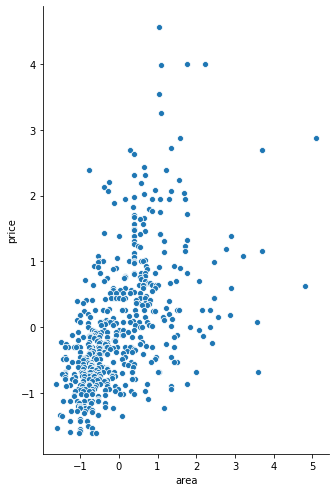

In [4]:
#Data-Relation 

import seaborn as sns
%matplotlib inline

sns.pairplot(housing, x_vars='area', y_vars='price',height=7, aspect=0.7, kind='scatter')

In [7]:
#applying gradient descent for multiple feature

X = housing[['area','bedrooms']]
y = housing['price']

X.insert(0,'intercept',1)
X =X.reindex(['intercept','area','bedrooms'], axis=1)

import numpy as np
X = np.array(X)
y = np.array(y)

theta = np.matrix(np.array([0,0,0])) 
alpha = 0.01
iterations = 1000

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    gdm_df = pd.DataFrame( columns = ['Bets','cost'])

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        gdm_df.loc[i] = [theta,cost]

    return gdm_df

gradient_descent_multi(X, y, theta, alpha, iterations)

,Bets,cost
0,"[2.3711919278232707e-18, 0.005350138644096793,...",0.494906
1,"[3.617901085750969e-18, 0.010641328951860771, ...",0.490824
2,"[5.785382366854027e-18, 0.015874226967184046, ...",0.486834
3,"[8.075090035989212e-18, 0.021049481374934606, ...",0.482935
4,"[1.0368871918058801e-17, 0.026167733584010238,...",0.479124
5,"[1.2243009867884753e-17, 0.031229617809450716,...",0.475400
6,"[1.472827975787134e-17, 0.03623576115361897, 0...",0.471759
7,"[1.62235159047977e-17, 0.041186783686461836, 0...",0.468202
8,"[1.7910240059641056e-17, 0.04608329852486083, ...",0.464724
9,"[2.06399627256919e-17, 0.05092591191108336, 0....",0.461326


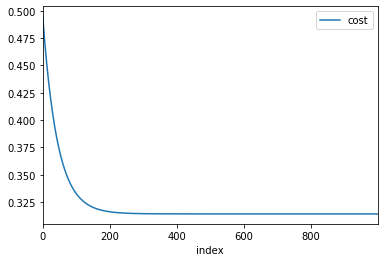

In [8]:
# print cost
gradient_descent_multi(X, y, theta, alpha, iterations).reset_index().plot.line(x='index', y=['cost'])